# Análise de dados sobre saúde do sono e estilo de vida

### Insights sobre padrões de sono e hábitos diários

# Visão geral do projeto:
O Sleep Health and Lifestyle Dataset fornece insights detalhados sobre os padrões de sono, hábitos diários e fatores de estilo de vida dos indivíduos. Essa etapa do projeto compreende dados já tratados e organizados para facilitar as análises. 

Essa análise tem como objetivo produzir insights a partir de métricas essenciais como duração do sono, qualidade do sono, níveis de atividade física, estresse, categoria de IMC, saúde cardiovascular e presença de distúrbios do sono.

# Fontes dos dados

Os dados foram obtidos no kaggle através do [link](https://www.kaggle.com/code/winterbearballu/sleep-health-and-lifestyle-eda)

Obs: este conjunto de dados é gerado sinteticamente e se destina exclusivamente a propósitos ilustrativos e educacionais. Ele visa fornecer uma estrutura realista para explorar e analisar correlações entre sono, hábitos de estilo de vida e métricas de saúde.

# Análise Exploratória

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations
from pprint import pprint

from scipy.stats import chi2_contingency, kruskal, shapiro

from src.config import DADOS_ORIGINAIS, DADOS_LIMPOS

In [5]:
df = pd.read_csv(DADOS_ORIGINAIS)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [7]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration (hours)',
       'Quality of Sleep (scale: 1-10)',
       'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)',
       'BMI Category', 'Blood Pressure (systolic/diastolic)',
       'Heart Rate (bpm)', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [8]:
df.columns = [
    "ID",
    "Genero",
    "Idade",
    "Ocupacao",
    "Duracao_sono",
    "Qualidade_sono",
    "Nivel_atividade_física",
    "Nivel_estresse",
    "IMC",
    "Pressao_arterial",
    "Frequencia_cardiaca",
    "Passos_diarios",
    "Disturbio_sono",
]

In [9]:
df.describe()

,ID,Idade,Duracao_sono,Qualidade_sono,Nivel_atividade_física,Nivel_estresse,Frequencia_cardiaca,Passos_diarios
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,39.950000,8.041250,6.125750,64.985000,5.47250,75.990000,11076.510000
std,115.614301,14.038883,2.390787,1.975733,32.297874,2.80873,15.099334,5364.789364
min,1.000000,18.000000,4.100000,1.000000,10.000000,1.00000,50.000000,2067.000000
25%,100.750000,29.000000,5.900000,4.700000,35.000000,3.00000,63.000000,6165.250000
50%,200.500000,40.000000,8.200000,6.100000,65.500000,5.00000,77.000000,11785.500000
75%,300.250000,49.000000,10.125000,7.425000,94.000000,8.00000,90.000000,15878.000000
max,400.000000,90.000000,12.000000,10.000000,120.000000,10.00000,100.000000,19958.000000


A primeira vista, não é possível identificar nenhum parâmetro que possa afetar diretamente na performance do modelo, exceto a coluna "Person ID" que se trata de uma coluna de identificação e será removida.

In [11]:
df.describe(exclude="number")

,Genero,Ocupacao,IMC,Pressao_arterial,Disturbio_sono
count,400,400,400,400,110
unique,2,4,4,250,2
top,Female,Student,Overweight,109/60,Insomnia
freq,201,110,109,17,79


Colunas categoricas serão devidamente tratadas e categorizadas afim de obter informações mais limpas para o modelo.

Além disso, vamos checar possíveis valores nulos nos dados:

In [13]:
df.isnull().sum()

ID                          0
Genero                      0
Idade                       0
Ocupacao                    0
Duracao_sono                0
Qualidade_sono              0
Nivel_atividade_física      0
Nivel_estresse              0
IMC                         0
Pressao_arterial            0
Frequencia_cardiaca         0
Passos_diarios              0
Disturbio_sono            290
dtype: int64

In [14]:
df["Disturbio_sono"].unique()

array([nan, 'Insomnia', 'Sleep Apnea'], dtype=object)

In [15]:
df["Disturbio_sono"] = df["Disturbio_sono"].fillna("No sleep disturbance")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      400 non-null    int64  
 1   Genero                  400 non-null    object 
 2   Idade                   400 non-null    int64  
 3   Ocupacao                400 non-null    object 
 4   Duracao_sono            400 non-null    float64
 5   Qualidade_sono          400 non-null    float64
 6   Nivel_atividade_física  400 non-null    int64  
 7   Nivel_estresse          400 non-null    int64  
 8   IMC                     400 non-null    object 
 9   Pressao_arterial        400 non-null    object 
 10  Frequencia_cardiaca     400 non-null    int64  
 11  Passos_diarios          400 non-null    int64  
 12  Disturbio_sono          400 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 40.8+ KB


Na coluna alvo, valores nulos, que indicavam a não ocorrência de desordem de sono, foram padronizados para 'No sleep Disturbance'

In [17]:
# Retirando coluna ID
df = df.drop(columns="ID")

Removida a coluna ID, será dividida a coluna "Blood Pressure (Systolic/diastolic)" para facilitar a leitura dos dados

In [19]:
df[["Sistolica", "Diastolica"]] = df["Pressao_arterial"].str.split('/', expand=True).astype(int)

df = df.drop("Pressao_arterial", axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genero                  400 non-null    object 
 1   Idade                   400 non-null    int64  
 2   Ocupacao                400 non-null    object 
 3   Duracao_sono            400 non-null    float64
 4   Qualidade_sono          400 non-null    float64
 5   Nivel_atividade_física  400 non-null    int64  
 6   Nivel_estresse          400 non-null    int64  
 7   IMC                     400 non-null    object 
 8   Frequencia_cardiaca     400 non-null    int64  
 9   Passos_diarios          400 non-null    int64  
 10  Disturbio_sono          400 non-null    object 
 11  Sistolica               400 non-null    int64  
 12  Diastolica              400 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 40.8+ KB


In [20]:
# Verificando se há valores duplicados

df[df.duplicated()]

,Genero,Idade,Ocupacao,Duracao_sono,Qualidade_sono,Nivel_atividade_física,Nivel_estresse,IMC,Frequencia_cardiaca,Passos_diarios,Disturbio_sono,Sistolica,Diastolica


Não havendo valores duplicados, agora será categorizado os dados não-numéricos e a quantidade de valores únicos darão uma perspectiva de quais são:

In [22]:
df.nunique().sort_values()

Genero                      2
Disturbio_sono              3
Ocupacao                    4
IMC                         4
Nivel_estresse             10
Sistolica                  36
Diastolica                 37
Frequencia_cardiaca        51
Idade                      59
Qualidade_sono             79
Duracao_sono               80
Nivel_atividade_física    108
Passos_diarios            393
dtype: int64

In [23]:
# Transformando em colunas categóricas

df["Genero"] = pd.Categorical(df["Genero"])
df["Disturbio_sono"] = pd.Categorical(df["Disturbio_sono"])
df["Ocupacao"] = pd.Categorical(df["Ocupacao"])
df["IMC"] = pd.Categorical(df["IMC"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Genero                  400 non-null    category
 1   Idade                   400 non-null    int64   
 2   Ocupacao                400 non-null    category
 3   Duracao_sono            400 non-null    float64 
 4   Qualidade_sono          400 non-null    float64 
 5   Nivel_atividade_física  400 non-null    int64   
 6   Nivel_estresse          400 non-null    int64   
 7   IMC                     400 non-null    category
 8   Frequencia_cardiaca     400 non-null    int64   
 9   Passos_diarios          400 non-null    int64   
 10  Disturbio_sono          400 non-null    category
 11  Sistolica               400 non-null    int64   
 12  Diastolica              400 non-null    int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 30.5 KB


Com os dados devidamente categorizados, passaremos a uma análise mais visual da distribuição dos dados utilizando histogramas

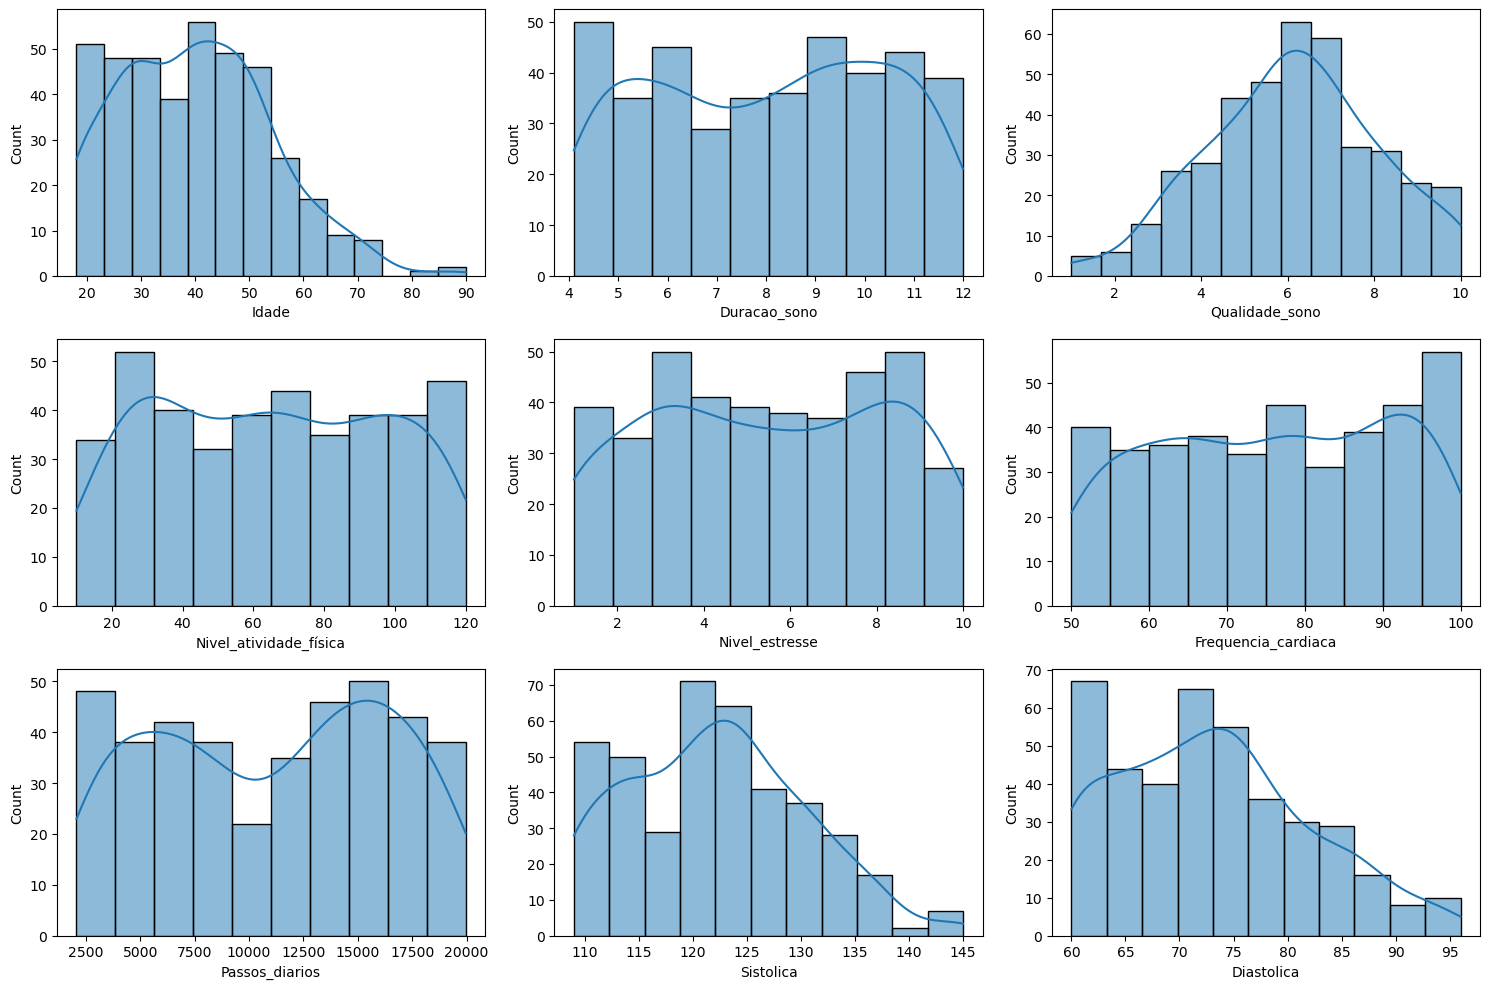

In [26]:
# Histplot

fig,axs = plt.subplots(3,3, figsize=(15, 10))

for ax, coluna in zip(axs.flatten(), df.select_dtypes(include="number")):
    sns.histplot(data=df, x=coluna, ax=ax, kde=True)

plt.tight_layout()

plt.show()

Conforme observado no histograma, vemos que os gráficos aparentemente não obedecem distribuição normal e será necessário correção das escalas para construirmos o modelo. Para isso, realizaremos pré-processamentos nessa base.

Além disso, podemos ver as caudas das distribuições mais alongadas para direita ou distribuições com dois picos.

Podemos explorar outras visualizações gráficas afim de obter mais informações desse conjunto de dados. Neste momento, vamos avaliar a assimetria e os Outliers desse conjunto de dados.

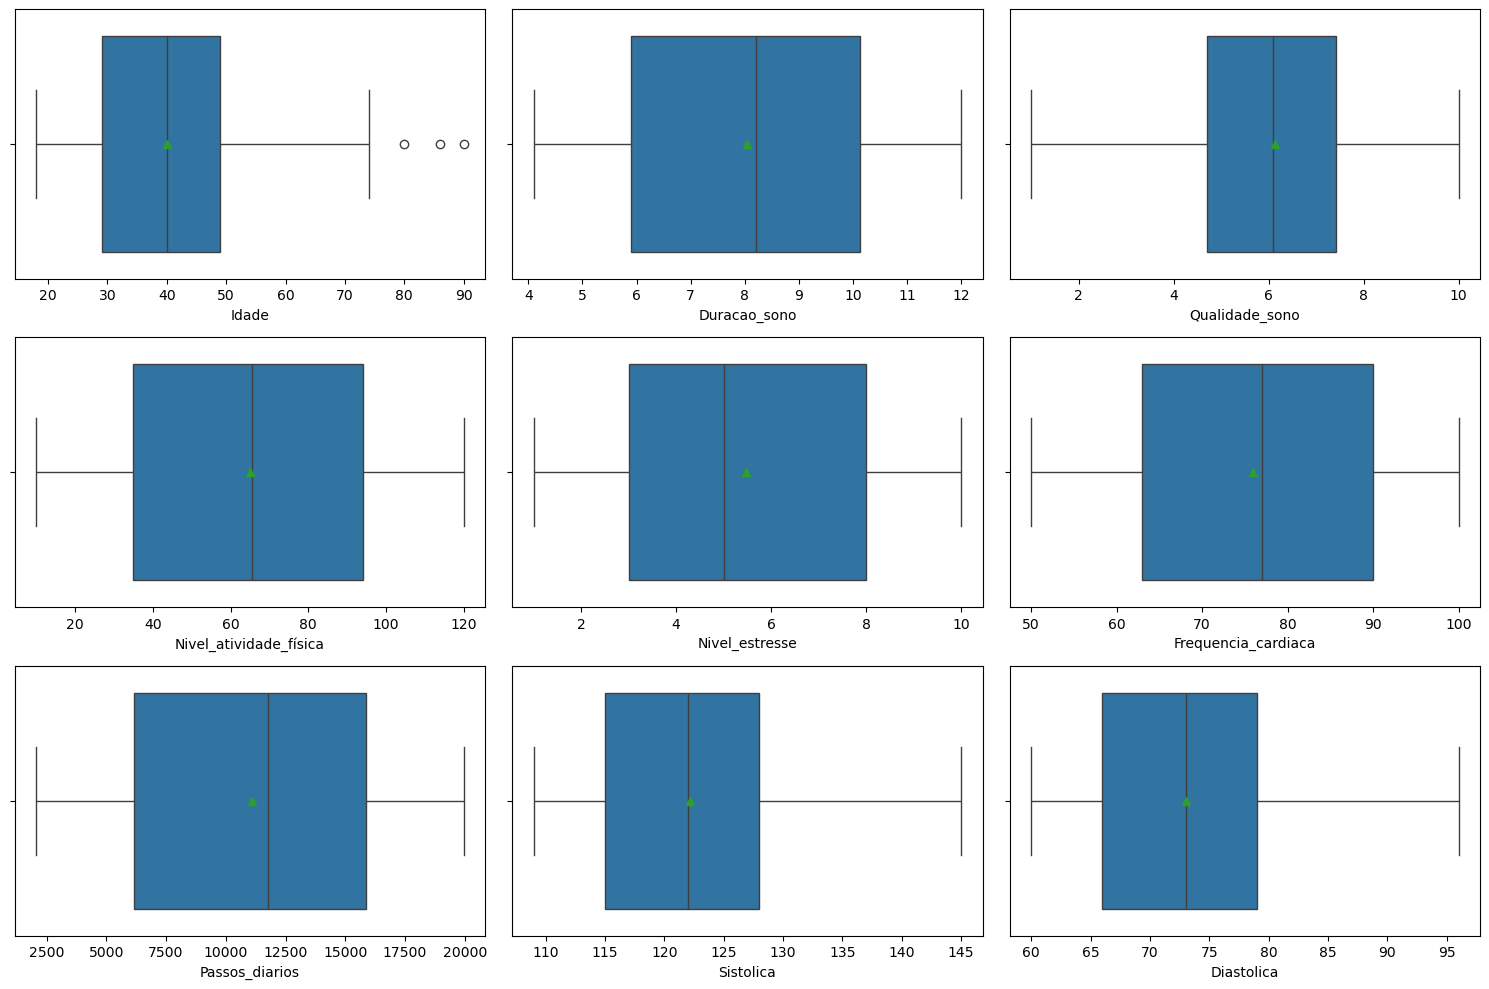

In [28]:
# Boxplot

fig,axs = plt.subplots(3,3, figsize=(15, 10))

for ax, coluna in zip(axs.flatten(), df.select_dtypes(include="number")):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True)

plt.tight_layout()

plt.show()

Observando o gráfico de boxplot é possível identificar apenas a coluna de idade contendo alguns outliers.

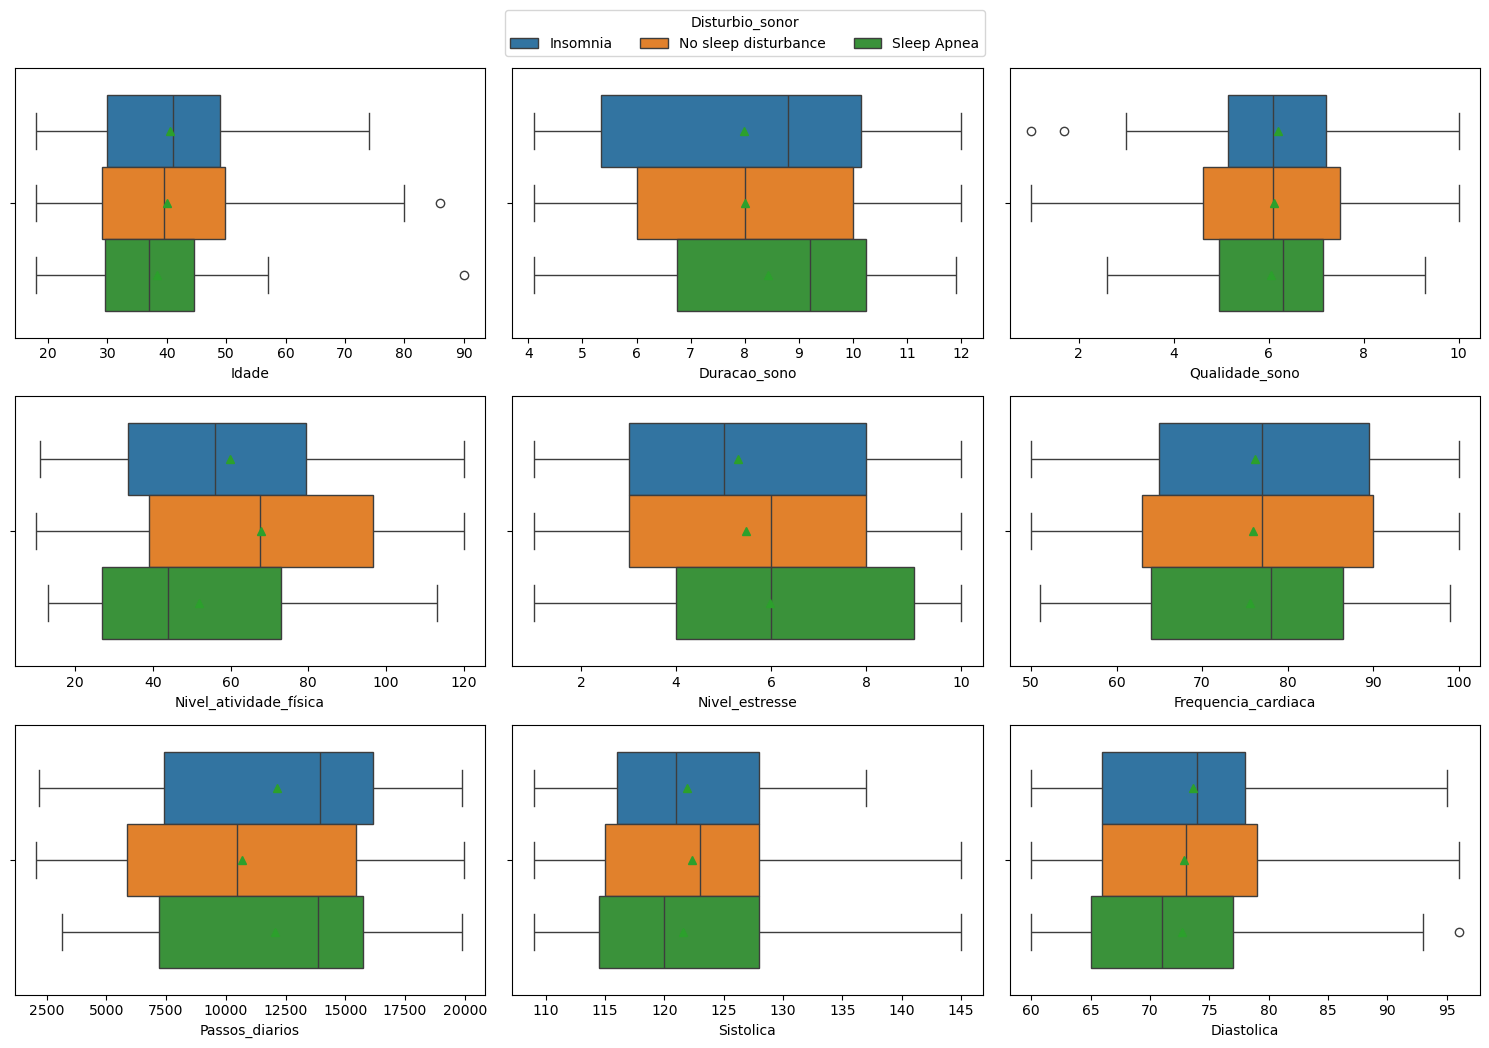

In [30]:
# Boxplot separando por classes

fig,axs = plt.subplots(3,3, figsize=(15, 10))

for ax, coluna in zip(axs.flatten(), df.select_dtypes(include="number")):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True, hue="Disturbio_sono")

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Disturbio_sonor", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

for ax in axs.flatten():
    legend = ax.get_legend()
    if legend:
        legend.remove()

plt.tight_layout()

plt.show()

Quando realizamos a análise dos boxplots separando por classes, observamos que é sutil a separação entre as classes.

In [32]:
# Verificando desbalanceamento entre as classes

df["Disturbio_sono"].value_counts(normalize=True)

Disturbio_sono
No sleep disturbance    0.7250
Insomnia                0.1975
Sleep Apnea             0.0775
Name: proportion, dtype: float64

Base com elevado grau de desbalanceamento, sendo necessário realizar pré-processamento afim de reduzir o efeito do desbalanceamento nos resultados do modelo.

# Análise estatística

## Inicialmente será realizado a análise da normalidade de Shapiro-Wilk para colunas numéricas

In [36]:
colunas_numericas = df.select_dtypes(include="number").columns

In [37]:
resultado_sw = []
alpha = 0.05

for coluna in colunas_numericas:
    estatistica, valor_p = shapiro(df[coluna], nan_policy="omit")
    resultado_sw.append(
        {
            "coluna": coluna,
            "estatistica": estatistica,
            "valor_p": valor_p,
            "normal": valor_p > alpha,
        }
    )

pd.DataFrame(resultado_sw)

,coluna,estatistica,valor_p,normal
0,Idade,0.973199,9.903227e-07,False
1,Duracao_sono,0.943316,3.122426e-11,False
2,Qualidade_sono,0.990094,8.489822e-03,False
3,Nivel_atividade_física,0.950136,2.291774e-10,False
4,Nivel_estresse,0.935786,4.112905e-12,False
5,Frequencia_cardiaca,0.945786,6.306589e-11,False
6,Passos_diarios,0.941059,1.670827e-11,False
7,Sistolica,0.975257,2.493606e-06,False
8,Diastolica,0.962603,1.443362e-08,False


Nenhuma coluna numérica obedece a distribuição normal, sendo necessário realizar uma avaliação não-paramétrica.

Para isso, a utilizada será o teste de Kruskal Wallis.

In [55]:
# Estruturando a análise estatística

analise_colunas_kruskal_w = {}

coluna_target = "Disturbio_sono"

alpha = 0.05

In [57]:
classes = df[coluna_target].unique()

classes

['No sleep disturbance', 'Insomnia', 'Sleep Apnea']
Categories (3, object): ['Insomnia', 'No sleep disturbance', 'Sleep Apnea']

In [61]:
agrupamento = df.groupby(coluna_target)

agrupamento

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11776\2194449468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupamento = df.groupby(coluna_target)


In [62]:
for coluna in colunas_numericas:
    nenhum = agrupamento.get_group(classes[0])[coluna]
    insonia = agrupamento.get_group(classes[1])[coluna]
    apneia = agrupamento.get_group(classes[2])[coluna]

    estatistica, valor_p = kruskal(nenhum, insonia, apneia)

    analise_colunas_kruskal_w[coluna] = {
        "Valor_p": valor_p,
        "Estatistica": estatistica,
        "Relação_estatística": valor_p < alpha
    }

pd.DataFrame(analise_colunas_kruskal_w).T

,Valor_p,Estatistica,Relação_estatística
Idade,0.660123,0.830658,False
Duracao_sono,0.681113,0.768055,False
Qualidade_sono,0.927315,0.150924,False
Nivel_atividade_física,0.010333,9.144845,True
Nivel_estresse,0.50022,1.385414,False
Frequencia_cardiaca,0.986711,0.026756,False
Passos_diarios,0.0715,5.276114,False
Sistolica,0.703489,0.703407,False
Diastolica,0.658236,0.836382,False


Conforme acima, apenas a coluna nível de atividade física apresentou diferença significativa com relação ao target.

## Para verificar análise estatística de colunas categóricas utilizaremos o teste Chi quadrado

In [65]:
# Criando tabelas de contingencia

colunas_categoricas = df.select_dtypes("category").columns

pares_contingencia = combinations(colunas_categoricas,2)

tabela_contingencia = {}

for coluna, linha in pares_contingencia:
    tabela_contingencia[f"{coluna} x {linha}"] = pd.crosstab(df[coluna], df[linha])
    print(linha, coluna)

Ocupacao Genero
IMC Genero
Disturbio_sono Genero
IMC Ocupacao
Disturbio_sono Ocupacao
Disturbio_sono IMC


In [66]:
# Realizando teste Chi2

resultado_chi = {}

for coluna, tabela in tabela_contingencia.items():
    chi_2, valor_p, _, _ = chi2_contingency(tabela)
    
    resultado_chi[coluna] = {
        "Chi_2": chi_2, 
        "Valor_p": valor_p,
        "Relação_estatística": valor_p < alpha
    }

df_tabelas_chi2 = pd.DataFrame(resultado_chi).T

df_tabelas_chi2

,Chi_2,Valor_p,Relação_estatística
Genero x Ocupacao,6.68081,0.082798,False
Genero x IMC,1.152177,0.764496,False
Genero x Disturbio_sono,1.024739,0.599074,False
Ocupacao x IMC,2.430191,0.982702,False
Ocupacao x Disturbio_sono,7.189117,0.303711,False
IMC x Disturbio_sono,4.805361,0.569009,False


Conforme observado acima, não há relação significativa entre as colunas categóricas

<Axes: >

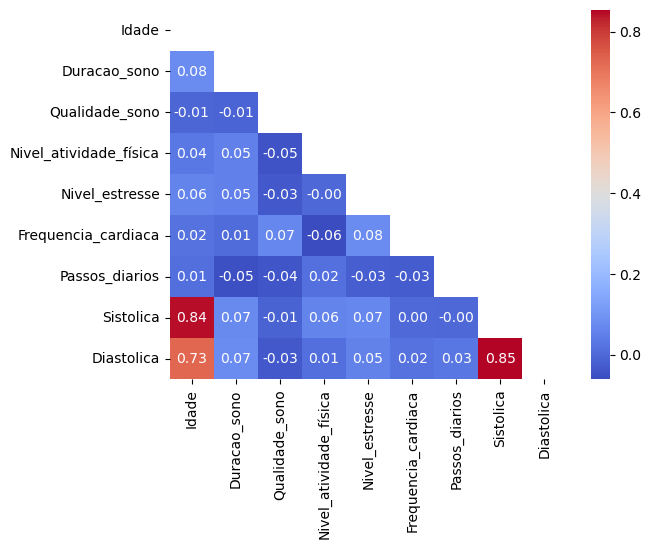

In [68]:
# Correlação numéricas

matriz = np.triu(df.select_dtypes("number").corr(method="spearman"))

fig, ax = plt.subplots()

sns.heatmap(df.select_dtypes("number").corr(method="spearman"), mask=matriz, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")

Dados negativos para normalidade, ou seja, análise de correlação deverá ser realizada pelo coeficiente de Spearman

Correlações mais altas para as colunas Idade x Systolic/Diastolic e Systolic x Diastolic.

Para avaliarmos a correlação entre colunas categoricas, será necessário alguns passos até mensurar o quão forte é a correlação a partir da métrica de "V de Cramer" para colunas categóricas.

In [71]:
# Calculando correlação entre colunas categóricas utilizando V de Cramer

n = len(df)
v_cramer= {}

for coluna, valores in resultado_chi.items():
    v_cramer[coluna] = np.sqrt((valores["Chi_2"])/(n*min(tabela_contingencia[coluna].shape[0] - 1, tabela_contingencia[coluna].shape[1]-1)))

v_cramer

{'Genero x Ocupacao': np.float64(0.12923631741030822),
 'Genero x IMC': np.float64(0.05366975919004921),
 'Genero x Disturbio_sono': np.float64(0.05061470376083845),
 'Ocupacao x IMC': np.float64(0.04500176399064094),
 'Ocupacao x Disturbio_sono': np.float64(0.0947966051377915),
 'IMC x Disturbio_sono': np.float64(0.07750291050812531)}

In [72]:
# Melhorando visualização

variaveis = df.select_dtypes("category").columns
matriz_v = pd.DataFrame(index=variaveis, columns=variaveis, dtype=float)

for chave, valor in v_cramer.items():
    linha, coluna = chave.split(" x ")
    matriz_v.loc[linha, coluna] = valor
    matriz_v.loc[coluna, linha] = valor

np.fill_diagonal(matriz_v.values, 1)

matriz_v

,Genero,Ocupacao,IMC,Disturbio_sono
Genero,1.000000,0.129236,0.053670,0.050615
Ocupacao,0.129236,1.000000,0.045002,0.094797
IMC,0.053670,0.045002,1.000000,0.077503
Disturbio_sono,0.050615,0.094797,0.077503,1.000000


<Axes: >

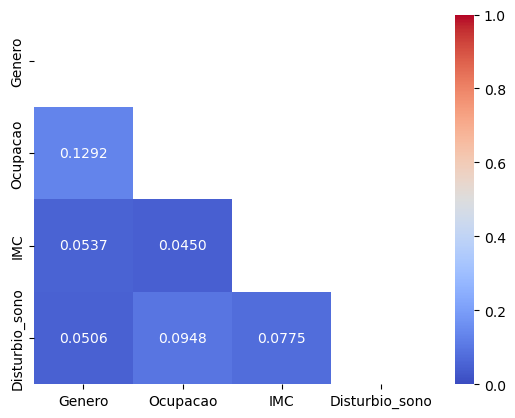

In [73]:
# Gerando gráfico de correlação

matriz = np.triu(matriz_v)

fig, ax = plt.subplots()

sns.heatmap(matriz_v, mask=matriz, annot=True, fmt=".4f", cmap="coolwarm", vmin=0, vmax=1, ax=ax)

Valores de colunas categóricas com baixa correlação entre elas

## Redução de tamanho do DataFrame

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Genero                  400 non-null    category
 1   Idade                   400 non-null    int64   
 2   Ocupacao                400 non-null    category
 3   Duracao_sono            400 non-null    float64 
 4   Qualidade_sono          400 non-null    float64 
 5   Nivel_atividade_física  400 non-null    int64   
 6   Nivel_estresse          400 non-null    int64   
 7   IMC                     400 non-null    category
 8   Frequencia_cardiaca     400 non-null    int64   
 9   Passos_diarios          400 non-null    int64   
 10  Disturbio_sono          400 non-null    category
 11  Sistolica               400 non-null    int64   
 12  Diastolica              400 non-null    int64   
dtypes: category(4), float64(2), int64(7)
memory usage: 30.5 KB


In [77]:
# Reduzindo bits das colunas numéricas

colunas_inteiras = df.select_dtypes(include="int64").columns

df[colunas_inteiras] = df[colunas_inteiras].apply(pd.to_numeric, downcast="integer")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Genero                  400 non-null    category
 1   Idade                   400 non-null    int8    
 2   Ocupacao                400 non-null    category
 3   Duracao_sono            400 non-null    float64 
 4   Qualidade_sono          400 non-null    float64 
 5   Nivel_atividade_física  400 non-null    int8    
 6   Nivel_estresse          400 non-null    int8    
 7   IMC                     400 non-null    category
 8   Frequencia_cardiaca     400 non-null    int8    
 9   Passos_diarios          400 non-null    int16   
 10  Disturbio_sono          400 non-null    category
 11  Sistolica               400 non-null    int16   
 12  Diastolica              400 non-null    int8    
dtypes: category(4), float64(2), int16(2), int8(5)
memory usage: 12.1 KB


In [78]:
# Reduzindo bits das colunas categóricas

colunas_categoricas = df.select_dtypes(include="float64").columns

df[colunas_categoricas] = df[colunas_categoricas].apply(pd.to_numeric, downcast="float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Genero                  400 non-null    category
 1   Idade                   400 non-null    int8    
 2   Ocupacao                400 non-null    category
 3   Duracao_sono            400 non-null    float32 
 4   Qualidade_sono          400 non-null    float32 
 5   Nivel_atividade_física  400 non-null    int8    
 6   Nivel_estresse          400 non-null    int8    
 7   IMC                     400 non-null    category
 8   Frequencia_cardiaca     400 non-null    int8    
 9   Passos_diarios          400 non-null    int16   
 10  Disturbio_sono          400 non-null    category
 11  Sistolica               400 non-null    int16   
 12  Diastolica              400 non-null    int8    
dtypes: category(4), float32(2), int16(2), int8(5)
memory usage: 9.0 KB


Conforme acima, houve redução significativa no tamanho da base.

In [80]:
df = df.to_parquet(DADOS_LIMPOS, index=False)

In [81]:
df_ml = pd.read_parquet(DADOS_LIMPOS)

df_ml

,Genero,Idade,Ocupacao,Duracao_sono,Qualidade_sono,Nivel_atividade_física,Nivel_estresse,IMC,Frequencia_cardiaca,Passos_diarios,Disturbio_sono,Sistolica,Diastolica
0,Male,29,Manual Labor,7.4,7.0,41,7,Obese,91,8539,No sleep disturbance,124,70
1,Female,43,Retired,4.2,4.9,41,5,Obese,81,18754,No sleep disturbance,131,86
2,Male,44,Retired,6.1,6.0,107,4,Underweight,81,2857,No sleep disturbance,122,70
3,Male,29,Office Worker,8.3,10.0,20,10,Obese,55,6886,No sleep disturbance,124,72
4,Male,67,Retired,9.1,9.5,19,4,Overweight,97,14945,Insomnia,133,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Female,36,Student,4.5,7.9,73,7,Normal,64,14497,Sleep Apnea,118,66
396,Female,45,Manual Labor,6.0,6.1,72,8,Obese,65,12848,Insomnia,132,80
397,Female,30,Student,5.3,6.5,58,10,Obese,66,15255,Insomnia,125,76
398,Female,41,Retired,11.0,9.1,73,9,Obese,75,6567,Sleep Apnea,130,75
